<a href="https://colab.research.google.com/github/Syilun/Deep-Learning-algorithms/blob/master/Optimizers_%E9%80%B2%E9%9A%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例目標:
推導 優化器: Adam, 了解其原理與優化過程

# 範例重點:

提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與  β的變化關係


# 以下的片段範例需要有 ffmpeg

請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間

>conda install -c conda-forge ffmpeg

>conda install ffmpeg

> NOTE: 必須在執行此一範例前先行安裝

In [ ]:
import sys
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=ebb1b92ce7daeb5dcf66dc0dbb22918cd815da3c30a550449bd52d237ffb147c
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
!pip install autograd
!pip install IPython

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest


# Objective function: the Beale function

In [ ]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [ ]:

minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [ ]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# Adam Optimizer

In [ ]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon # 計算曲度圖形斜率
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [ ]:
EPOCHS = 3000
SHOW_STEPS = 100 # Batch size 設比較小的話，確保training data中每個資料都拿來訓練不會有缺失，如果資料集單純會訓練很快複雜就會很慢
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:3000
times:0 weights:[1.  1.5] loss:41.25
times:30 weights:[ 2.13588453 -0.34485524] loss:2.180367962091556
times:60 weights:[2.49505145 0.34228598] loss:0.07502630179118633
times:90 weights:[2.77487495 0.42358211] loss:0.014349728183855118
times:120 weights:[2.87389939 0.46716694] loss:0.0029372840546848427
times:150 weights:[2.92998707 0.48140933] loss:0.0008597327796483667
times:180 weights:[2.96127929 0.49024883] loss:0.0002505980288811529
times:210 weights:[2.97942401 0.49480268] loss:6.939679132808684e-05
times:240 weights:[2.98953775 0.49735962] loss:1.7752731575861785e-05
times:270 weights:[2.99495329 0.49872927] loss:4.1059449385132606e-06
times:300 weights:[2.99770681 0.49942345] loss:8.45116921362035e-07
times:330 weights:[2.99902455 0.49975493] loss:1.5268267126678675e-07
times:360 weights:[2.99961408 0.49990306] loss:2.3883924111769127e-08
times:390 weights:[2.99985903 0.49996459] loss:3.1858457939731637e-09
loss:3.1858457939731637e-09 is less than

In [ ]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[ 1.          0.47040769  0.2090573   0.20982581  0.39664684  0.69315982
   1.04126846  1.39488022  1.71422384  1.96705844  2.13588453  2.22324943
   2.24794463  2.23602134  2.21347962  2.2017948   2.21498546  2.25798275
   2.32683229  2.41066708  2.49505145  2.56647083  2.61677433  2.64553577
   2.65922366  2.66770745  2.67974013  2.69944359  2.72536066  2.7523163
   2.77487495  2.79038679  2.79998378  2.80725592  2.81572984  2.82683085
   2.8395024   2.85146108  2.86100153  2.86805235  2.87389939  2.88001622
   2.88699839  2.89435343  2.90113869  2.90680117  2.91153424  2.91597053
   2.92059078  2.92538424  2.92998707  2.93408357  2.93767514  2.94101495
   2.94433717  2.94766412  2.95084657  2.95374955  2.95638137  2.95885907
   2.96127929  2.9636384   2.96586731  2.96792117  2.96982371  2.97163267
   2.97337919  2.97504824  2.97661059  2.97806142  2.97942401  2.9807229
   2.98196191  2.98312948  2.98421895  2.98523845  2.98620199  2.98711614
   2.987978    2.98878414 

# Visualize Convergence Trace

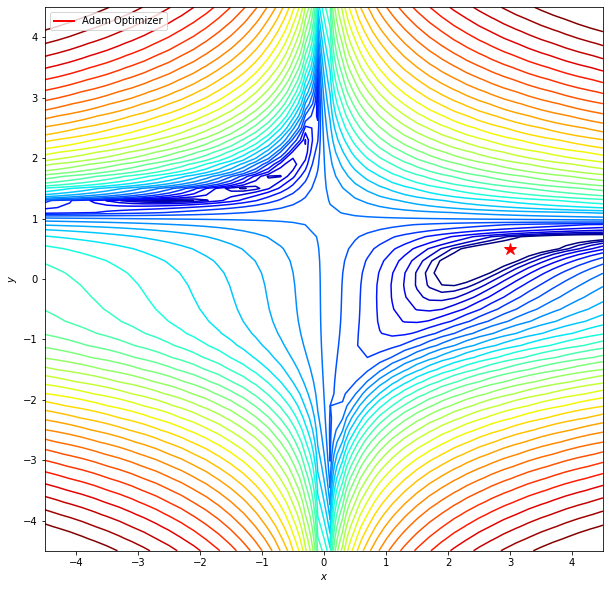

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
import matplotlib.animation as manimation; manimation.writers.list()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())